In [4]:
from rdkit import Chem
from rdkit.Chem import PandasTools
import pandas as pd
import os
import glob2

,ref_url,submitter_name,submitter_email,submitter_institution,generation_date,method,smiles,ref_mols,original ID,ID,ROMol,inchikey,tags,ref_pdb,alias,HIPPO ID,original SMILES
0,https://hippo.winokan.com,Max Winokan,max.winokan@diamond.ac.uk,DLS,2024-05-03,base_curated,smiles,fragment inspirations,original ID,ver_1.2,,NaN,NaN,NaN,NaN,NaN,NaN
1,None,None,None,NaN,None,None,NaN,"cx0892a,cx0281a",CHIKVMac-DLS-JA001,CHIKVMac-DLS-JA001,,WRQXFZOITXUYML-UHFFFAOYSA-N,"['merge', 'select (JA) [SeeSAR]', 'JA', 'SeeSAR']",cx0281a,CHIKVMac-DLS-JA001,325,Cn1nccc1C(=O)NCc1csc(-c2ncn[nH]2)n1
2,None,None,None,NaN,None,None,NaN,"cx0406a,cx0281a",CHIKVMac-DLS-JA002,CHIKVMac-DLS-JA002,,SCMCRGMETQKMMQ-RKDXNWHRSA-N,"['merge', 'select (JA) [SeeSAR]', 'JA', 'SeeSAR']",cx0281a,CHIKVMac-DLS-JA002,326,Cc1nsc(N[C@@H]2CCC[C@H]2c2csc(-c3nc[nH]n3)n2)n1
3,None,None,None,NaN,None,None,NaN,"cx0441a,cx0316a",CHIKVMac-DLS-JA003,CHIKVMac-DLS-JA003,,WXVLITNXXROEMR-UHFFFAOYSA-N,"['merge', 'select (JA) [SeeSAR]', 'JA', 'SeeSAR']",cx0300a,CHIKVMac-DLS-JA003,327,CCc1nc(NC(=O)c2ccnc(NC3CC=CC3)c2)no1
4,None,None,None,NaN,None,None,NaN,"cx0314a,cx1114a",CHIKVMac-DLS-JA004,CHIKVMac-DLS-JA004,,LWEMDYODZODBHC-SSDOTTSWSA-N,"['merge', 'select (JA) [SeeSAR]', 'JA', 'SeeSAR']",cx0300a,CHIKVMac-DLS-JA004,328,O=C1CC[C@H](Cn2cnccc2=O)N1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,None,None,None,NaN,None,None,NaN,"cx0692a,cx0969f",cx0969f-cx0692a,cx0969f-cx0692a,,HZMWNEMTDOMFDH-UHFFFAOYSA-N,"['butcher: adenine', 'fragmenstein', 'select (...",cx0270a,cx0969f-cx0692a,4873,O=C(Nc1ccccc1)c1c(CO)cc2c(c1O)OCC2
351,None,None,None,NaN,None,None,NaN,"cx0935a,cx0969f",cx0969f-cx0935a,cx0969f-cx0935a,,XIZQDAMBIPVMJZ-UHFFFAOYSA-N,"['butcher: adenine', 'fragmenstein', 'select (...",cx0270a,cx0969f-cx0935a,4885,OCc1cc2c(c(Nc3ccc(O)cc3)c1O)OCC2
352,None,None,None,NaN,None,None,NaN,"cx0692a,cx1075a",cx1075a-cx0692a,cx1075a-cx0692a,,GLWBHHUWZUOZOL-UHFFFAOYSA-N,"['butcher: adenine', 'fragmenstein', 'select (...",cx0270a,cx1075a-cx0692a,4941,COCC(=O)Nc1cc(Br)cc(N)n1
353,None,None,None,NaN,None,None,NaN,"cx0692a,cx1076a",cx1076a-cx0692a,cx1076a-cx0692a,,FNHGBIFBXKFXQD-OUJBWJOFSA-N,"['butcher: adenine', 'fragmenstein', 'select (...",cx0270a,cx1076a-cx0692a,4995,COCC(=O)N[C@H]1CCCC[C@]12C(=O)NCC[C@@H]2Br

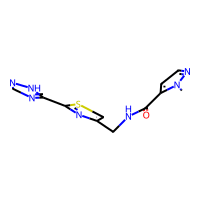
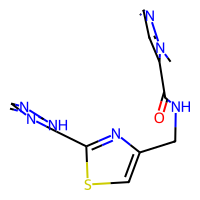
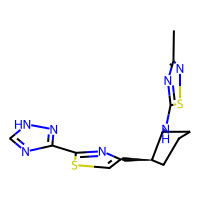
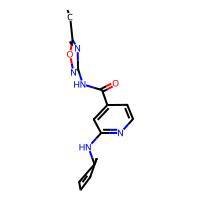
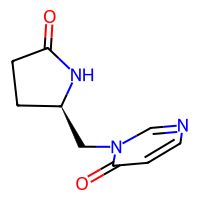
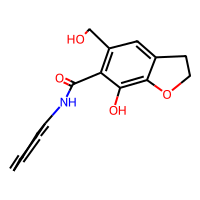
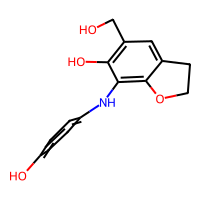
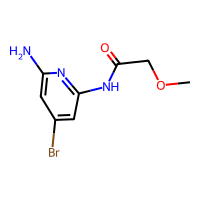
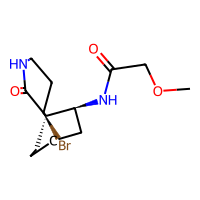
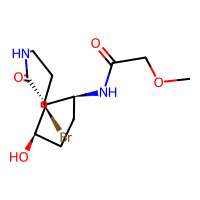

In [16]:
orig = PandasTools.LoadSDF('../designs/base_compounds_354.sdf')
orig.to_csv('../designs/base_compounds_354.csv')
orig

In [17]:
# prepare templates folder, move all apo-desolv.pdb files to templates folder
apo_desolv = glob2.glob('/Users/kate_fieseler/PycharmProjects/CHIKV-Mac-syndirella-run/fragments/aligned_files/**/**apo-desolv.pdb')
for file in apo_desolv:
    os.rename(file, '/Users/kate_fieseler/PycharmProjects/CHIKV-Mac-syndirella-run/fragments/templates/' + os.path.basename(file))

In [19]:
# prepare master csv to then split later
rows = []
for i, row in orig.iterrows():
    if i == 0:
        continue
    hits: list[str] = row['ref_mols'].split(',')
    if len(hits) > 2:
        print(f'{i} has more than 2 hits')
    new_row = {
        'smiles': row['original SMILES'],
        'compound_set': row['ID'],
        'template': row['ref_pdb']
    }
    for i, hit in enumerate(hits):
        new_row[f'hit{i+1}'] = hit
    rows.append(new_row.copy())
df = pd.concat([pd.DataFrame(rows)])
df.to_csv('../designs/syndirella_master.csv', index=False)
df

,smiles,compound_set,template,hit1,hit2
0,Cn1nccc1C(=O)NCc1csc(-c2ncn[nH]2)n1,CHIKVMac-DLS-JA001,cx0281a,cx0892a,cx0281a
1,Cc1nsc(N[C@@H]2CCC[C@H]2c2csc(-c3nc[nH]n3)n2)n1,CHIKVMac-DLS-JA002,cx0281a,cx0406a,cx0281a
2,CCc1nc(NC(=O)c2ccnc(NC3CC=CC3)c2)no1,CHIKVMac-DLS-JA003,cx0300a,cx0441a,cx0316a
3,O=C1CC[C@H](Cn2cnccc2=O)N1,CHIKVMac-DLS-JA004,cx0300a,cx0314a,cx1114a
4,O=c1ccncn1C[C@H]1CCS(=O)(=O)C1,CHIKVMac-DLS-JA005,cx0300a,cx0314a,cx1182a
...,...,...,...,...,...
349,O=C(Nc1ccccc1)c1c(CO)cc2c(c1O)OCC2,cx0969f-cx0692a,cx0270a,cx0692a,cx0969f
350,OCc1cc2c(c(Nc3ccc(O)cc3)c1O)OCC2,cx0969f-cx0935a,cx0270a,cx0935a,cx0969f
351,COCC(=O)Nc1cc(Br)cc(N)n1,cx1075a-cx0692a,cx0270a,cx0692a,cx1075a
352,COCC(=O)N[C@H]1CCCC[C@]12C(=O)NCC[C@@H]2Br,cx1076a-cx0692a,cx0270a,cx0692a,cx1076a


In [21]:
# save each row of master csv as a separate csv
for i, row in df.iterrows():
    row.to_csv(f'/Users/kate_fieseler/PycharmProjects/CHIKV-Mac-syndirella-run/csvs/syndirella_input{i}.csv', index=False)

In [22]:
# Define the file path
file_path = '/Users/kate_fieseler/PycharmProjects/CHIKV-Mac-syndirella-run/jobs/template.sh'

# Define the string to search and the replacement string
search_string = 'NUM'

for i in range(354):
    replacement_string = str(i)
    
    # Open the file, read its contents, replace the occurrences, and write it back
    with open(file_path, 'r') as file:
        file_contents = file.read()
    
    # Replace the occurrences of the search string with the replacement string
    new_contents = file_contents.replace(search_string, replacement_string)
    
    new_path = f'/Users/kate_fieseler/PycharmProjects/CHIKV-Mac-syndirella-run/jobs/job{i}.sh'
    
    # If you want to write to a new file, you can do:
    with open(new_path, 'w') as new_file:
        new_file.write(new_contents)

print("Replacement complete.")


Replacement complete.


In [23]:
# make txt file with first 10 jobs
with open('/Users/kate_fieseler/PycharmProjects/CHIKV-Mac-syndirella-run/first_10_jobs.txt', 'w') as f:
    for i in range(10):
        f.write(f'job{i}.sh\n')